<a href="https://colab.research.google.com/github/amannain122/credit_risk_analysis/blob/main/notebooks/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1


In [3]:
target = df['loan_status']
df.drop('loan_status', axis=1, inplace=True)
num_cols = df.select_dtypes(include=np.number).columns

## Normalizing Numerical Feature using MinMax Scaler

In [4]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.032258,0.028557,OWN,0.227273,EDUCATION,B,0.014493,0.321348,0.109756,N,0.000000
1,0.161290,0.028557,MORTGAGE,0.045455,MEDICAL,C,0.144928,0.418539,0.682927,N,0.035714
2,0.096774,0.313616,RENT,0.181818,MEDICAL,C,1.000000,0.551124,0.634146,N,0.000000
3,0.129032,0.257012,RENT,0.363636,MEDICAL,C,1.000000,0.497191,0.658537,Y,0.071429
4,0.032258,0.030087,OWN,0.090909,VENTURE,A,0.057971,0.096629,0.292683,N,0.000000


## Categorical Variable Transformation

In [5]:
label_encoder = LabelEncoder()
df['default_history'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df.drop('cb_person_default_on_file', axis=1, inplace=True)

In [6]:
# Mapping for loan_grade
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grades'] = df['loan_grade'].map(grade_mapping)
df.drop('loan_grade', axis=1, inplace=True)

In [7]:
cat_cols = ['person_home_ownership','loan_intent']
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
df = pd.concat([df, encoded_df], axis=1)
df.drop(cat_cols, axis=1, inplace=True)
df.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,default_history,loan_grades,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.032258,0.028557,0.227273,0.014493,0.321348,0.109756,0.000000,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.161290,0.028557,0.045455,0.144928,0.418539,0.682927,0.035714,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.096774,0.313616,0.181818,1.000000,0.551124,0.634146,0.000000,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.129032,0.257012,0.363636,1.000000,0.497191,0.658537,0.071429,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.032258,0.030087,0.090909,0.057971,0.096629,0.292683,0.000000,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Collinearity Check

In [8]:
df = pd.concat([df, target], axis=1)
df.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,default_history,loan_grades,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,0.032258,0.028557,0.227273,0.014493,0.321348,0.109756,0.000000,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.161290,0.028557,0.045455,0.144928,0.418539,0.682927,0.035714,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.096774,0.313616,0.181818,1.000000,0.551124,0.634146,0.000000,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.129032,0.257012,0.363636,1.000000,0.497191,0.658537,0.071429,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.032258,0.030087,0.090909,0.057971,0.096629,0.292683,0.000000,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


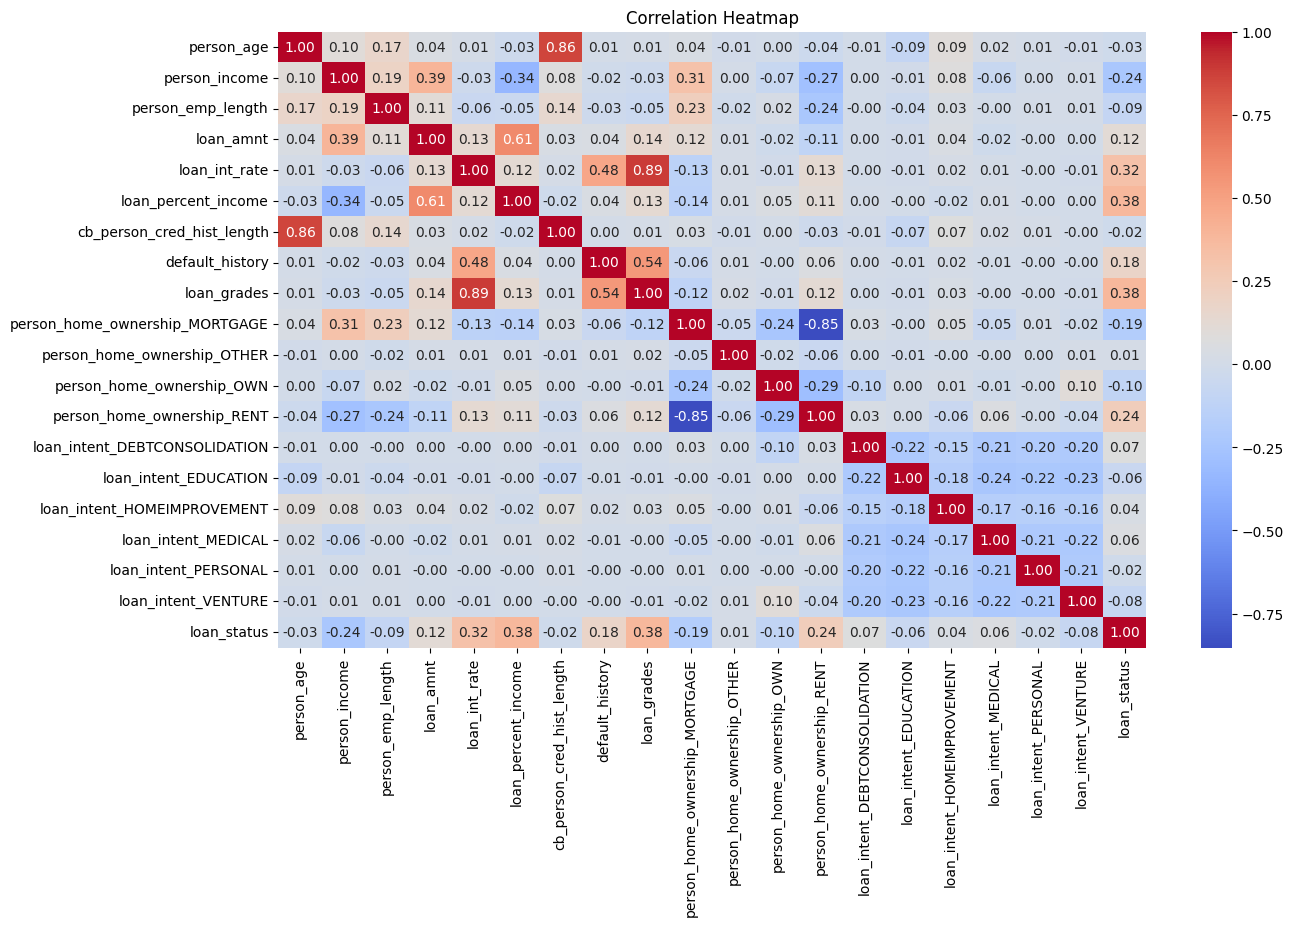

In [9]:
correl = df.corr()

plt.figure(figsize = (14,8))
sns.heatmap(correl, annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

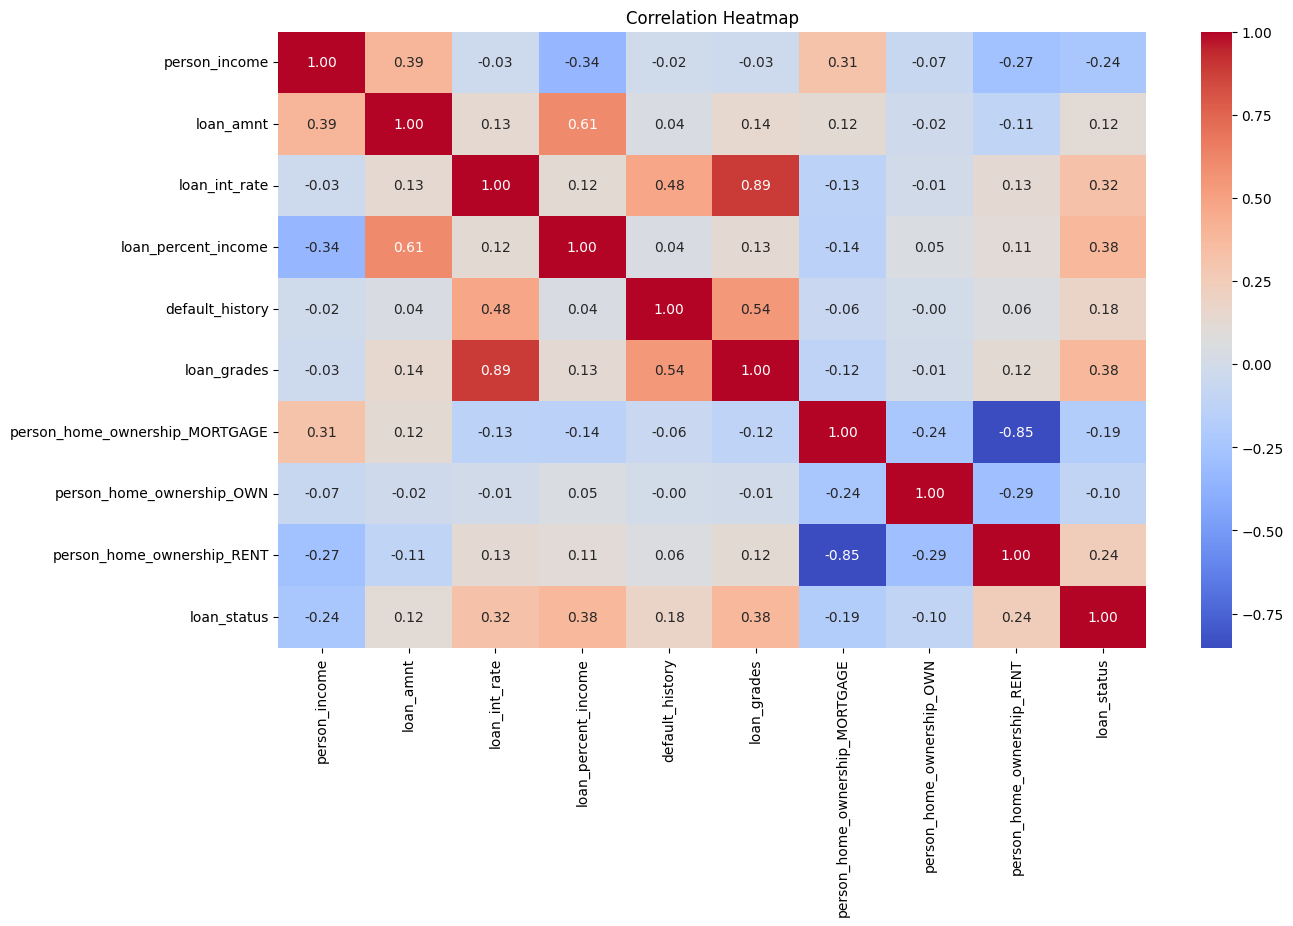

In [10]:
threshold = 0.09

df = df.drop(correl[abs(correl['loan_status']) < threshold].index, axis=1)

plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Handling Imbalance

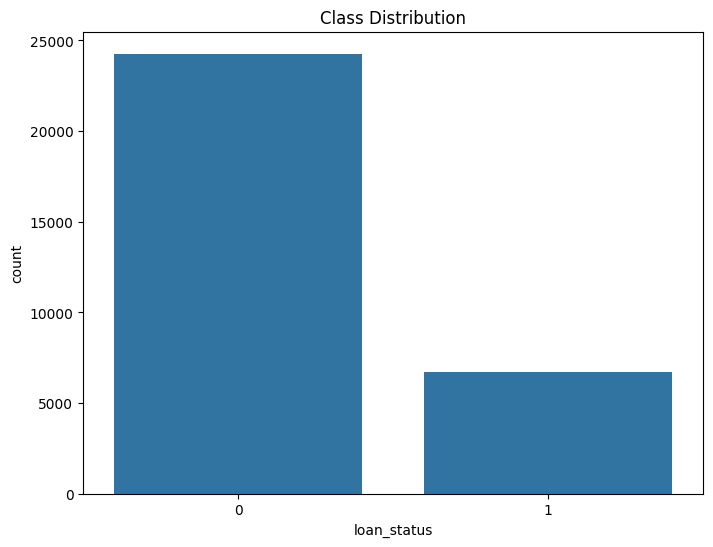

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Class Distribution')
plt.show()

In [13]:
from re import X
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
df = pd.concat([X_resampled, y_resampled], axis=1)
df.to_csv('final_data.csv', index=False)